In [2]:
'''导入信号信息'''
import h5py
'''导入信号的参数'''
signal_pa = {}
with h5py.File('/data/yecq/para_estimation_Michaelson/source_1/signal/signal_1.hdf5','r') as f:
    keys = [key for key in f['params'].keys()]
    for key in keys:
        signal_pa[key] = f['params'][key][()]

print(signal_pa)

{'M': 1000000.0, 'Phi_phi0': 1.0471975511965976, 'Phi_r0': 1.0471975511965976, 'Phi_theta0': 2.795918604066906, 'T': 0.5, 'a': 0.0, 'dist': 0.18, 'dt': 15.0, 'e0': 0.2, 'mu': 10, 'p0': 8.5, 'phiK': 0.5235987755982988, 'phiS': 0.7853981633974483, 'qK': 0.5235987755982988, 'qS': 0.7853981633974483, 't_out': 0.39401588660578385, 'x0': 1.0}


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def read(path):
    with open(path, "r") as f:  # 打开文件
        data = f.readlines()  # 读取文件
#     print(data)
    f.close()
    return data


path = '/data/yecq/para_estimation_Michaelson/source_1/harmonic/test2/snr_1.txt'
path_0 = '/data/yecq/para_estimation_Michaelson/source_1/harmonic/test2/hamonic_pa_1.txt'

path_2 = '/data/yecq/para_estimation_Michaelson/source_1/harmonic/test2/snr_22.txt'
path_22 = '/data/yecq/para_estimation_Michaelson/source_1/harmonic/test2/hamonic_pa_22.txt'

path_3 = '/data/yecq/para_estimation_Michaelson/source_1/harmonic/re_small_mu/snr.txt'
path_33 = '/data/yecq/para_estimation_Michaelson/source_1/harmonic/re_small_mu/hamonic_pa.txt'


'''导入数据'''
data = []
pa = []

# 导入第一个文件夹的数据
data_1 = read(path)  # 读取文件
pa_1 = read(path_0)  # 读取文件

data.extend(data_1[:])
pa.extend(pa_1[:len(data)])

print(len(data),len(pa))

# 导入第二个文件夹的数据
data_2 = read(path_2)
pa_2 = read(path_22)

data.extend(data_2[:])
pa.extend(pa_2[:len(data_2)])

print(len(data),len(pa))
M = []
p = []
mu = []
e = []
snr = []

large_snr = []
large_M = []
large_p = []

for i in range(len(data)-5):
    snr.append(float(data[i][:-2]))
    M.append(float(pa[i].split(",")[0].split(':')[-1]))
    p.append(float(pa[i].split(',')[2].split(':')[-1]))
    e.append(float(pa[i].split(',')[3].split(':')[-1]))
    mu.append(float(pa[i].split(',')[1].split(':')[-1]))
    
    if float(data[i][:-2]) >6:
        large_snr.append(float(data[i][:-2]))
        large_M.append(float(pa[i].split(",")[0].split(':')[-1]))
        large_p.append(float(pa[i].split(',')[2].split(':')[-1]))
      

    
# 导入第三个文件夹的数据，这个文件夹设定了M和mu 的范围围殴【5.75，6.25】和【9.5，10.5】
data_3 = read(path_3)
pa_3 = read(path_33)


M_samll_range =  []
p_samll_range =  []
mu_samll_range =  []
e_samll_range =  []
snr_samll_range =  []

large_snr_samll_range =  []
large_M_samll_range =  []
large_p_samll_range =  []        

for i in range(len(data_3)-5):
    if float(data_3[i][:-2]) >6:
        snr_samll_range.append(float(data_3[i][:-2]))
        M_samll_range.append(float(pa_3[i].split(",")[0].split(':')[-1]))
        p_samll_range.append(float(pa_3[i].split(',')[2].split(':')[-1]))
        e_samll_range.append(float(pa_3[i].split(',')[3].split(':')[-1]))
        mu_samll_range.append(float(pa_3[i].split(',')[1].split(':')[-1]))


        large_snr_samll_range.append(float(data_3[i][:-2]))
        large_M_samll_range.append(float(pa_3[i].split(",")[0].split(':')[-1]))
        large_p_samll_range.append(float(pa_3[i].split(',')[2].split(':')[-1]))
      



23750 23750
24178 24178


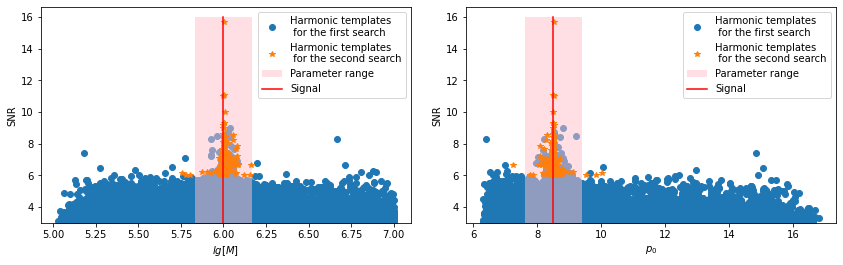

In [3]:
sigam_M = np.std(np.log10(large_M))
median_M = np.log10(large_M[np.argmax(large_snr)])

sigam_p = np.std(large_p)
median_p = large_p[np.argmax(large_snr)]


plt.figure(figsize=(12,4))
plt.subplots_adjust(left=0.05, right=0.97, top=0.9, bottom=0.15,
                wspace=0.15, hspace=0.4)
ax1 = plt.subplot(1,2,1)
ax1.plot(np.log10(M),snr,linestyle='',marker = 'o',label='Harmonic templates \n for the first search',zorder=1)
ax1.plot(np.log10(M_samll_range),snr_samll_range,linestyle='',marker = '*',label='Harmonic templates \n for the second search',zorder=3)
ax1.fill_between([5.83367315906253,6.169403530067075],3,16,facecolor = 'pink', alpha = 0.5,label="Parameter range",zorder=2)
ax1.plot([np.log10(signal_pa['M']),np.log10(signal_pa['M'])],[3,16],c = 'r',label='Signal',zorder=4)
plt.ylim(3,)
plt.ylabel("SNR",fontsize=10)
plt.xlabel(r"$lg[M]$",fontsize=10)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(p,snr,linestyle='',marker = 'o',label='Harmonic templates \n for the first search',zorder=1)
plt.plot(p_samll_range,snr_samll_range,linestyle='',marker = '*',label='Harmonic templates \n for the second search',zorder=3)
plt.fill_between([7.608300260392278, 9.414604819536569],3,16,facecolor = 'pink', alpha = 0.5,label="Parameter range",zorder=2)
plt.plot([signal_pa['p0'],signal_pa['p0']],[3,16],c = 'r',label='Signal',zorder=4)
plt.ylim(3,)
plt.ylabel("SNR",fontsize=10)
plt.xlabel(r"$p_{0}$",fontsize=10)
plt.legend(loc='upper right')
plt.savefig('./m_p_distribution.pdf',dpi = 1000)



In [4]:
print([median_M,sigam_M])
print([median_p,sigam_p])

[6.0360857323039605, 0.28558082064890905]
[8.795412231319217, 1.5175129732107357]
